In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [2]:
messages=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [3]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
msz=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','messages'])

In [6]:
msz['length']=msz['messages'].apply(len)

In [7]:
msz.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


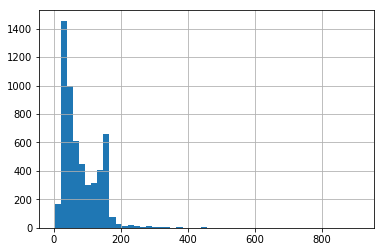

In [8]:
msz['length'].hist(bins=50)

In [9]:
msz['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [10]:
msz[msz['length']==910]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC87D83BA8>,
      dtype=object)

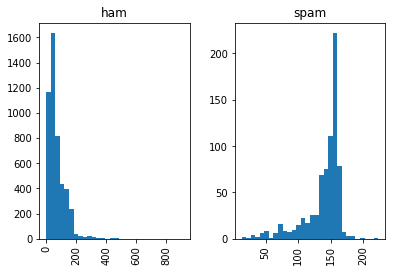

In [11]:
msz.hist(bins=30,by='label')

In [12]:
mm='Sample message! Notice: it has punctuation.'

In [13]:
import string

In [14]:
nopunc=[c for c in mm if c not in string.punctuation]

In [15]:
nopunc=''.join(nopunc)

In [16]:
from nltk.corpus import stopwords

In [17]:
[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

['Sample', 'message', 'Notice', 'punctuation']

In [18]:
def word_process(message):
    nopunc=[c for c in message if c not in string.punctuation ]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]

In [19]:
word_process('Sample message! Notice: it has punctuation.')

['Sample', 'message', 'Notice', 'punctuation']

In [20]:
msz.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
model=CountVectorizer(analyzer=word_process)

In [23]:
model.fit(msz['messages'])

CountVectorizer(analyzer=<function word_process at 0x000001DC87AE8400>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [24]:
len(model.vocabulary_)

11425

In [25]:
ms4=msz['messages'][3]

In [26]:
ms4

'U dun say so early hor... U c already then say...'

In [27]:
bow=model.transform([ms4])

In [28]:
print(bow)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [29]:
model.get_feature_names()[9554]

'say'

In [30]:
msz_bow=model.transform(msz['messages'])

In [31]:
msz_bow.shape

(5572, 11425)

In [32]:
msz_bow.nnz

50548

In [33]:
sparcity=100*msz_bow.nnz/(msz_bow.shape[0]*msz_bow.shape[1])
sparcity

0.07940295412668218

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

In [35]:
tfidf=TfidfTransformer().fit(msz_bow)

In [36]:
tfidf4=tfidf.transform(bow)

In [38]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [41]:
tfidf.idf_[model.vocabulary_['university']]

8.527076498901426

In [42]:
message_tfidf=tfidf.transform(msz_bow)

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
spam_detect_model=MultinomialNB().fit(message_tfidf,msz['label'])

In [50]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [53]:
msz['label'][3]

'ham'

In [54]:
all_pred=spam_detect_model.predict(message_tfidf)

In [57]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [58]:
from sklearn.pipeline import Pipeline

In [61]:
pipeline=Pipeline([
    ('bag_of_wprd',CountVectorizer(analyzer=word_process)),
    ('tfidf',TfidfTransformer()),
    ('spam_detector',MultinomialNB())
])

In [62]:
from sklearn.cross_validation import train_test_split

In [63]:
msz_train, msz_test, label_train, label_test = train_test_split(msz['messages'],msz['label'], test_size=0.3)

In [64]:
pipeline.fit(msz_train,label_train)

Pipeline(memory=None,
     steps=[('bag_of_wprd', CountVectorizer(analyzer=<function word_process at 0x000001DC87AE8400>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), pre...alse, use_idf=True)), ('spam_detector', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [65]:
pred=pipeline.predict(msz_test)

In [66]:
pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(label_test,pred))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1455
       spam       1.00      0.72      0.84       217

avg / total       0.96      0.96      0.96      1672

